# Oscillating Particle
In this example, we show how `matnimation` can be used to generate a simple animation of a particle moving in the $(x,y)$ plane. The trajectory of the particle is given by:
$$
\begin{align*}
x(t) &= t \\
y(t) &= \sin(t)
\end{align*}
$$
where the time interval is taken to be $t\in[0,2\pi]$. 

## Step 0: Import Dependencies
We first import the required modules. For local modules, python will search in the notebook's directory by default, which is `~/matnimation/examples` in our case. However, the source code is located in `~/matnimation/src`. To change the current working directory to the parent `~/matnimation`, we use the command `%cd ..`. 

In [20]:
%%capture 
%cd ..

In [31]:
import numpy as np
from matplotlib import colors
from src.matnimation.canvas.single_canvas import SingleCanvas
from src.matnimation.artist.animated.animated_single_scatter import AnimatedSingleScatter

## Step 1: Generate Trajectory
We start by discretizing time and finding the trajectory at all timesteps.

In [15]:
# generate timearray
tmin, tmax, N_timesteps = 0, 2*np.pi, 60
time_array = np.linspace(tmin, tmax, N_timesteps)

# generate trajectory at all timesteps
x_particle = time_array
y_particle = np.sin(time_array)

In `time_array`, we chose the number of timesteps `N_timesteps` to be 60, which means that the final animation will contain 60 frames in total. At a later stage, when we construct the `Animation` object, we will set the time `interval` between each frame. The total duration of the rendered animation will then be `N_timesteps * interval`. 

## Step 2: Generate Canvas
Now we generate a `canvas` that will host the animated object (i.e. the particle), which will be contructed in the next step. We make a simple animation with only a single panel, so we use `SingleCanvas`. We set the `figsize` in inches, the resolution/dots-per-inch `dpi`, the `time_array`, the `axis_limits` and the `axis_labels`.  

**Important:** The canvas should be thought of as the stage on which animated (and static) objects live over time. Therefore, it takes the `time_array` as argument. 

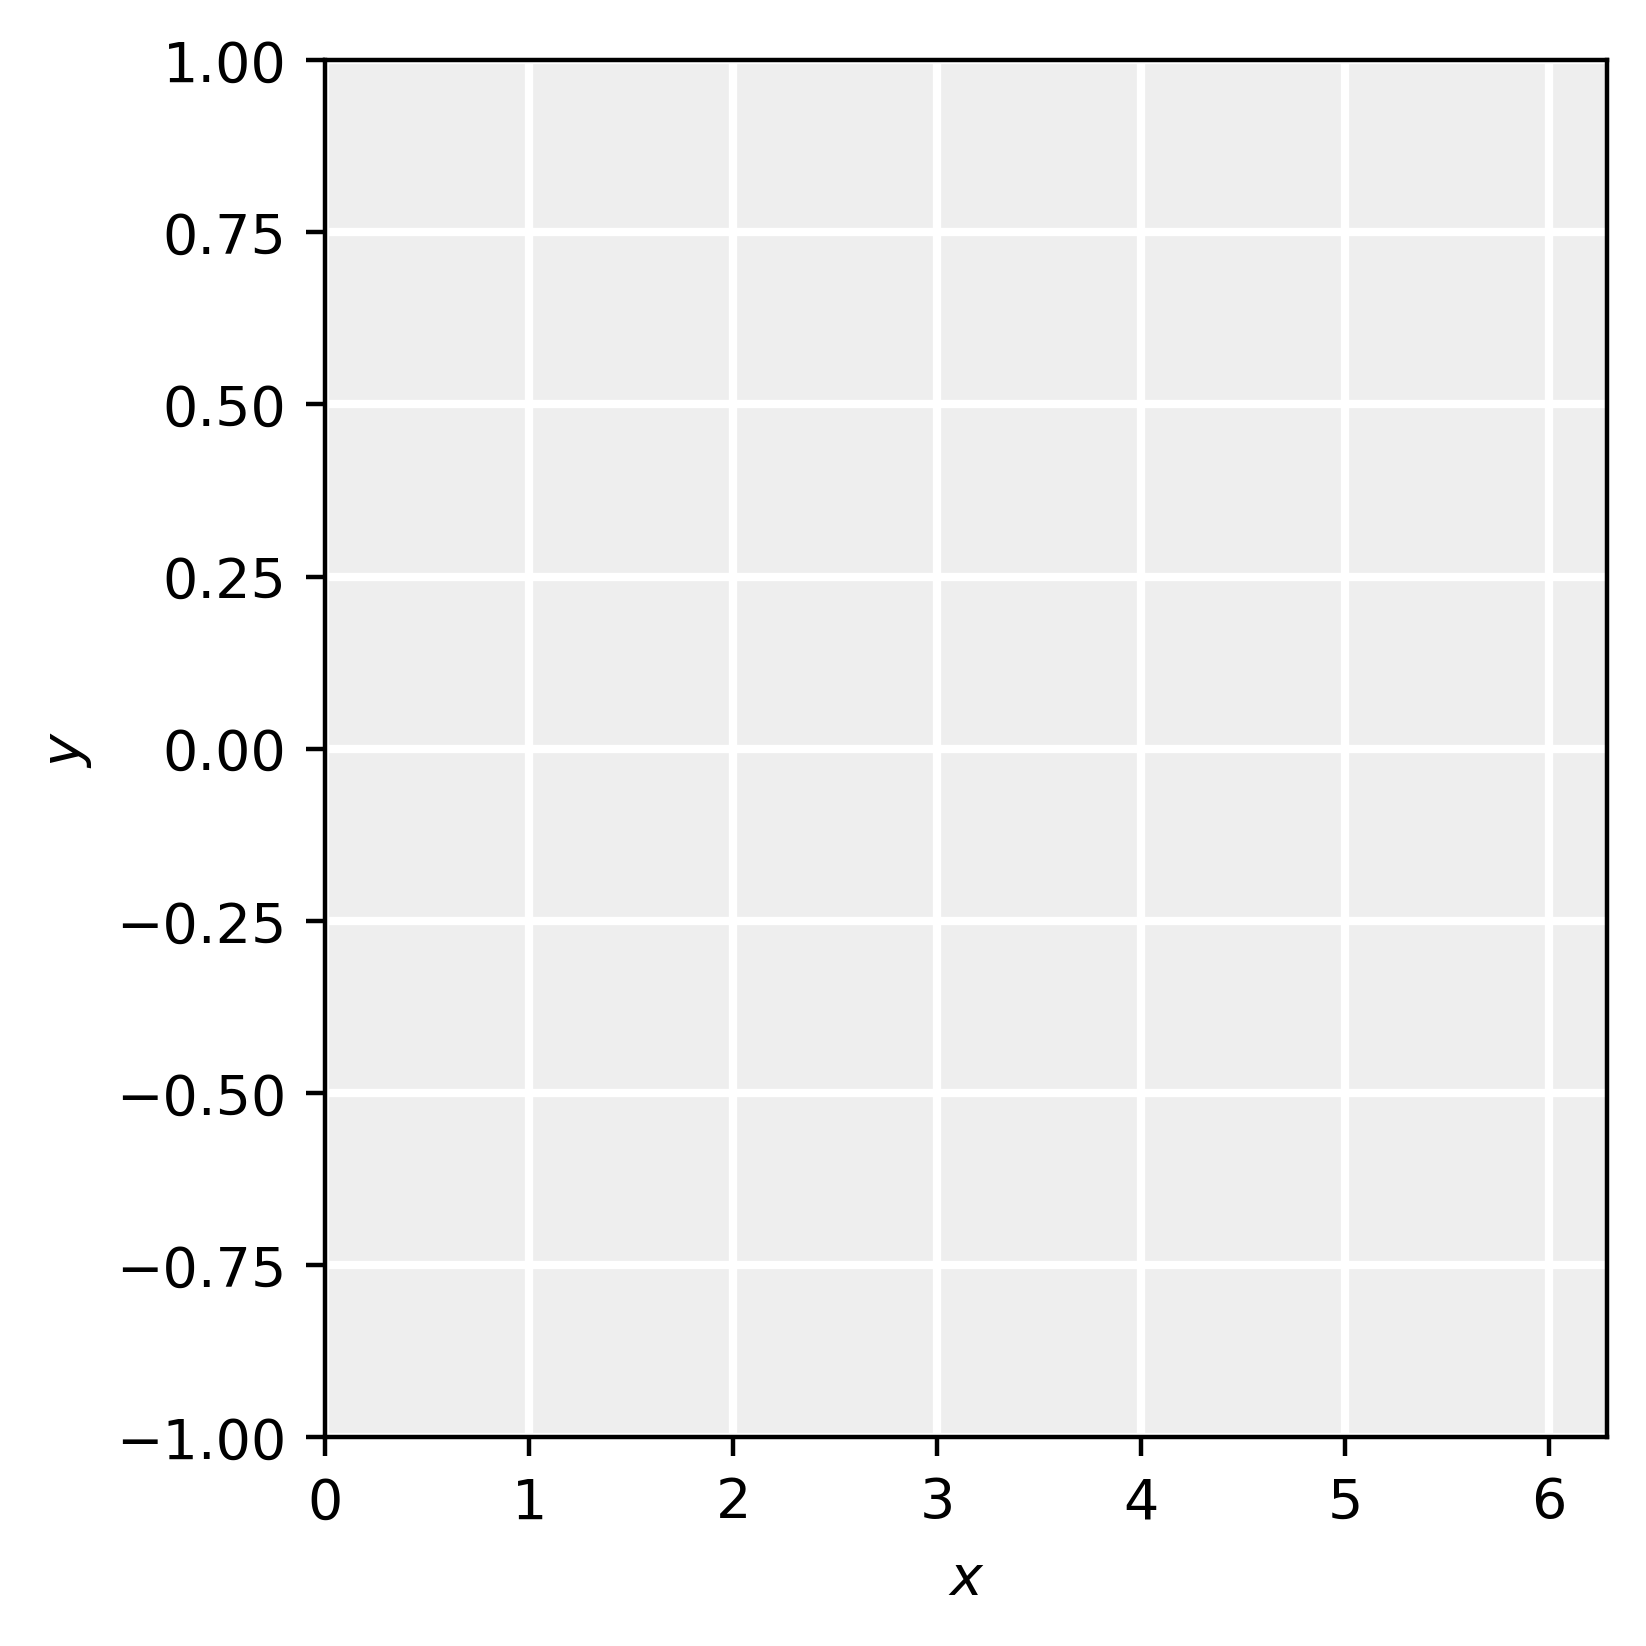

In [28]:
canvas = SingleCanvas(
    figsize = (4,4),
    dpi = 400,
    time_array = time_array,
    axis_limits = [0, 2*np.pi, -1, 1],
    axis_labels = ['$x$', '$y$']
)


## Step 3: Generate Animated Object
Now we can construct the `AnimatedObject`. In our case we have a single particle moving in the plane, so it is best represented by the subclass `AnimatedSingleScatter`. We give it the name `'Particle'` and provide its animation data (the $x$ and $y$ coordinates at each timestep) via the arrays `x_particle` and `y_particle`. 

**Important:** For all instances of `AnimatedObject`, the dimensions of the animation data must be compatible with `time_array`. In our case this means that the length of `x_particle` and `y_particle` must equal that of `time_array`. 

In [ ]:
particle = AnimatedSingleScatter('Particle', x_particle, y_particle)
particle.set_styling_properties(markeredgecolor = 'tab:blue', markerfacecolor = colors.to_rgba('tab:blue', 0.4))
canvas.add_artist(particle, in_legend = True)

Above, we have set some styling properties via the `set_styling_properties` method, which accepts the keyword arguments `marker`, `markeredgecolor`, `markeredgewidth`, `markerfacecolor` and `markersize`. For details on those, see the Matplotlib docs on the [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) object. Lastly, we have added the `particle` to the `canvas` via `add_artist` and specified that it should be added to the canvas' legend (if this is constructed).  